In [1]:
import pylab as plt
import numpy as np
import pandas as pd
import proposal as pp  #installed with pip
import scipy
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import re
import sys
import glob
from MCEq.core import config, MCEqRun
import crflux.models as crf
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle

In [2]:
CLRS=["gray","firebrick","orchid","deepskyblue","orange","blueviolet","magenta","limegreen","pink","tomato","red","black","yellow","darkgreen"]

energies=[100,250,500,750,1000,1500,2000,3000,4000,5000,6000,7500,8500,10000,11000,12500,15000,20000,25000]
GeV=1000

NumToRun=1000

In [12]:
#MCeQ outputs
r=0

for files in glob.glob('/Users/rogerslc/Documents/MuFluxPred/AIRSdensity/Muons*degrees.h5'):
    #print (files,re.search('Muons(.*)degrees', files))
    run=re.search('Muons(.*)degrees', files)
    ths=int(run.group(1))
    if r==0:
        mussimData=pd.read_hdf(files)
        mussimData['theta']=    ths
        r+=1
    else:
        df=pd.read_hdf(files)
        df['theta']=ths
        mussimData=mussimData.append(df, ignore_index=True)

#for sea level altitudes at 0 degrees, I should run this for 89 degrees too       
df=pd.read_hdf('/Users/rogerslc/Documents/MuFluxPred/AIRSdensity/Muons0degrees_0altitude.h5')
df['theta']=0
mussimData=mussimData.append(df, ignore_index=True)

mussimData['altitude']=mussimData.altitude*10**-2    
k=mussimData.theta.unique()
k.sort()
l=mussimData.phis.unique()
print(k)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [22]:
df.theta.unique()

array([0])

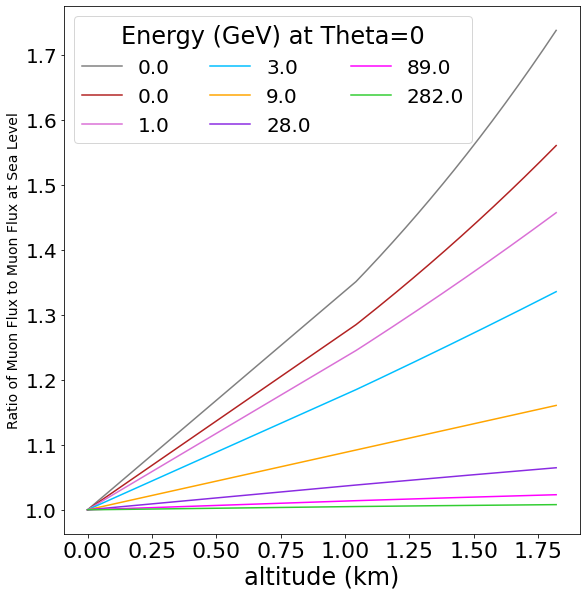

In [23]:
#comparing to figure 4 in http://pcbat1.mi.infn.it/~battist/astrop/lipari_lepton.pdf


clr=0
ts=0
plt.figure(figsize=(8,8))

NT=mussimData[mussimData.theta==ts].Energies.unique()
for E in NT[0:37:5]: #lower energies matching plot
    #for E in NT[40:len(NT)-10:10]: #higher energies
    pt=mussimData[(mussimData.theta==ts)&(mussimData.Energies==E)]
    dem=pt[pt.altitude==0].MuFLux
    plt.plot(pt.altitude*10**-3,pt.MuFLux/dem.iloc[0],color=CLRS[clr],label=str(np.round(E,0)))
    clr+=1    
    
#plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.xlim(1., 2e2)
plt.xlabel('altitude (km)',fontsize=24)
#ylim(.99, 1.1)
plt.ylabel('Ratio of Muon Flux to Muon Flux at Sea Level',fontsize=14)
plt.legend(fontsize=20,title='Energy (GeV) at Theta='+str(ts),title_fontsize=24,ncol=3,loc='upper left')
plt.show()

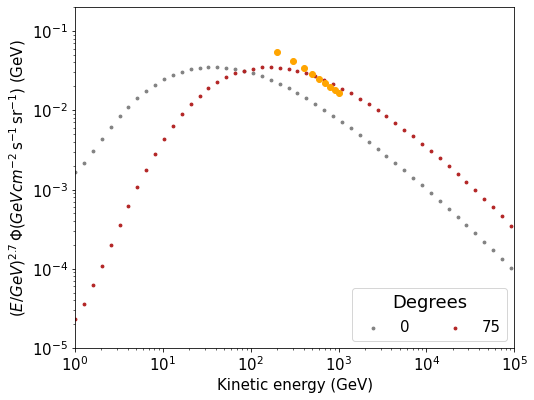

In [6]:
nrgs=np.geomspace(1,10**8,80)

#for comparing to PDG plot

plt.figure(figsize=(7,5.5))

clr=0

for theta in range(0,90,75):

    flxs=[]     
    err=[]
    
    
    #MCeq data
    #bring in the intorpolation funcs
    with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator'+str(theta)+'.pkl', 'rb') as f:
        FluxMuons = pickle.load(f)
    
    for NG in nrgs:
        flxs.append(FluxMuons(NG,650)[0][0]) #NG is energy in GeV, 650 is an altitude choice in meters
        
    plt.scatter(nrgs, flxs*nrgs**-.3, label=str(theta),s=8,color=CLRS[clr])
     #plt.scatter(x*GeV/10**6, y, label='_nolegend_',alpha=.3,s=8,color=CLRS[clr])      
    clr+=1

#pdg equation
theta=0
for E in range(200,1100,100):
    plt.scatter(E,(.14)*(1/(1+1.1*E*np.cos(np.deg2rad(theta))/115)+.054/(1+1.1*E*np.cos(np.deg2rad(theta))/850)),color=CLRS[clr+2])
   
    
#for N in energies:
    #plt.vlines(N*(GeV/10**6),2e-3, 9e-1)
    
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.xlim(1, 10**5)
plt.xlabel('Kinetic energy (GeV)',fontsize=15)
plt.ylim(10**-5, .2)

plt.ylabel(r'$(E/ {GeV})^{2.7}\,\Phi (GeV cm^{-2}\,$s$^{-1}\,$sr$^{-1}$) (GeV)',fontsize=15)
plt.legend(fontsize=15,title='Degrees',title_fontsize=18,ncol=4,loc='lower right')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()





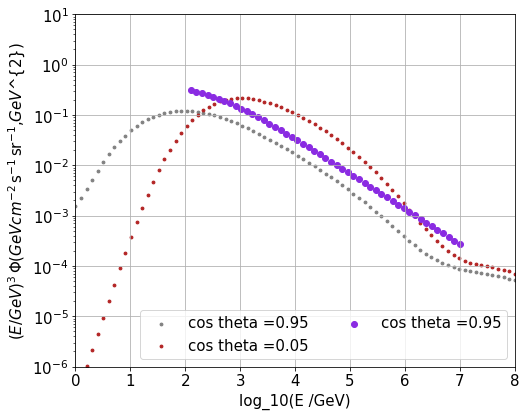

In [7]:
nrgs=np.geomspace(1,10**8,80)

#for comparing to fig 3 right in https://arxiv.org/pdf/1910.08676.pdf

plt.figure(figsize=(7,5.5))
clr=0

for theta in range(18,90,69):

    flxs=[]     
    flxs2=[]
    err=[]

    
    #MCeq data
    #bring in the intorpolation funcs
    with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator'+str(theta)+'.pkl', 'rb') as f:
        FluxMuons = pickle.load(f)
    
    for NG in nrgs:
        flxs.append(FluxMuons(NG,650)[0][0]) #NG is energy in GeV, 650 is an altitude choice in meters


    plt.scatter(np.log10(nrgs), flxs, label='cos theta ='+str(np.round(np.cos(np.deg2rad(theta)),2)),s=8,color=CLRS[clr])
    clr+=1

   

#plotting eqn from PDG
theta=18
cnt=0
for E in np.geomspace(100,10**7,50):

    if E <100/np.cos(np.deg2rad(theta)):
        continue
    if cnt==0:
        plt.scatter(np.log10(E),((.14)*(1/(1+1.1*E*np.cos(np.deg2rad(theta))/115)+.054/(1+1.1*E*np.cos(np.deg2rad(theta))/850)))*E**.3,color=CLRS[clr+3],label='cos theta ='+str(np.round(np.cos(np.deg2rad(theta)),2)))
    else:
        plt.scatter(np.log10(E),((.14)*(1/(1+1.1*E*np.cos(np.deg2rad(theta))/115)+.054/(1+1.1*E*np.cos(np.deg2rad(theta))/850)))*E**.3,color=CLRS[clr+3])
    cnt+=1

plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
#plt.xlim(Nmin*GeV, 1100)
plt.xlim(0, 8)
plt.xlabel('log_10(E /GeV)',fontsize=15)
#plt.ylim(4e-8, 4e-3)
#plt.ylim(4e-3, 1.)
plt.ylim(10**-6, 10**1)
plt.grid()

plt.ylabel(r'$(E/ {GeV})^{3}\,\Phi (GeV cm^{-2}\,$s$^{-1}\,$sr$^{-1}$,$GeV$^{2}$)$',fontsize=15)
plt.legend(fontsize=15,title_fontsize=18,ncol=2,loc='lower right')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()

    